<h1 align=center><font size=5> Regression Models </font></h1>

### Part A

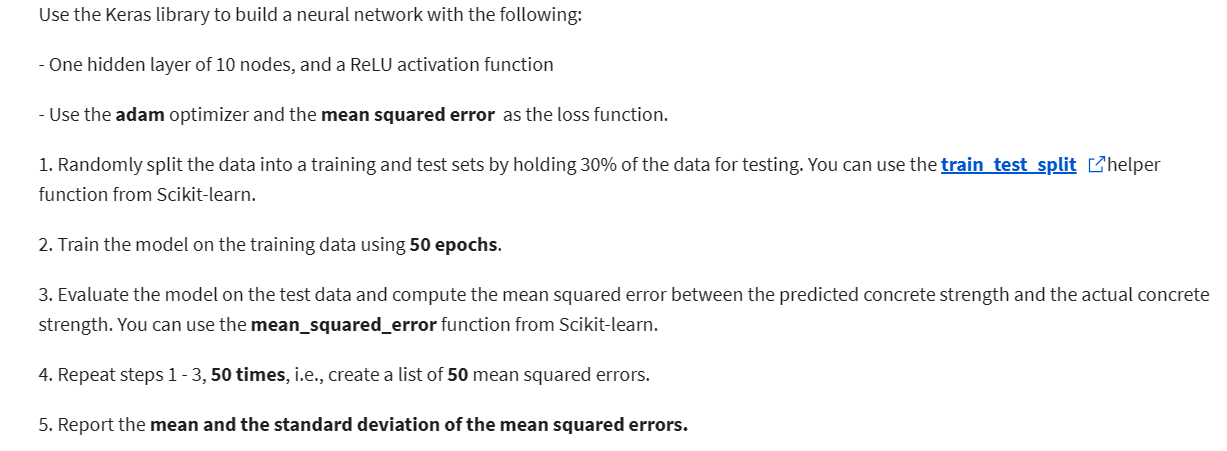

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense

import pandas as pd


# Import data
df = pd.read_csv('C:\\Users\\LENOVO\\OneDrive\\Desktop\\concrete_data.csv', encoding = 'latin-1')

"The target variable is the concreate sample strength"
X = df.drop(columns = ['Strength'])  # Predictor
y = df['Strength'].values   #target

# Test-Train Split
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 4)
n_cols = train_X.shape[1]

def regression_model():
    
    # model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols, )))    #Hidden layer
    model.add(Dense(1))  #output layer
    
    'Optimizing the model'
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    return model   #Returning the mode 

# Training the model
"""Next, we will train and test the model at the same time using the fit method.
we will train the model for 50 epochs"""

model = regression_model().fit(train_X, train_y, epochs = 50, verbose = 0)

###### As we can't run our program everytime and wait for results. so we can save it.

In [29]:
model.save('regression_model.h5')

AttributeError: 'History' object has no attribute 'save'

Since our model contains multidimensional arrays of data, then models are usually saved as .h5 files. When we are ready to use your model again, we use the load_model function from keras.models.

In [ ]:
from keras.models import load_model
pretrained_model = load_model('regression_model.h5')

###### Mean Squared Error

In [18]:
import sklearn.metrics as metrics

predictions = pretrained_model.predict(test_X)    # Predicting the targets for input testing data
reg_MSE = metrics.mean_squared_error(test_y, predictions)   # mean squared error between predictions and actual values
reg_MSE

10/10 [==============================] - 0s 2ms/step


127.36137206793823

###### Creating a list of mean squared errors

In [22]:
mse_list = []    # we will append the mean square errors to this empty list

# Runing the loop for 50 iterrations
for i in range(50):
    
    # Test-Train Split
    train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 4,  shuffle=True)   
    
    #fitting the model after randomly 
    model = regression_model().fit(train_X, train_y, epochs = 50, verbose = 0)
    predictions = pretrained_model.predict(test_X)    # Predicting the targets for input testing data
    reg_MSE = metrics.mean_squared_error(test_y, predictions)   # mean squared error between predictions and actual values
    mse_list.append(reg_MSE)

mse_list

10/10 [==============================] - 0s 4ms/step
Iteration no # 0
10/10 [==============================] - 0s 2ms/step
Iteration no # 1
10/10 [==============================] - 0s 2ms/step
Iteration no # 2
10/10 [==============================] - 0s 3ms/step
Iteration no # 3
10/10 [==============================] - 0s 4ms/step
Iteration no # 4
10/10 [==============================] - 0s 2ms/step
Iteration no # 5
10/10 [==============================] - 0s 3ms/step
Iteration no # 6
10/10 [==============================] - 0s 4ms/step
Iteration no # 7
10/10 [==============================] - 0s 3ms/step
Iteration no # 8
10/10 [==============================] - 0s 3ms/step
Iteration no # 9
10/10 [==============================] - 0s 3ms/step
Iteration no # 10
10/10 [==============================] - 0s 2ms/step
Iteration no # 11
10/10 [==============================] - 0s 2ms/step
Iteration no # 12
10/10 [==============================] - 0s 2ms/step
Iteration no # 13
10/10 [=========

[127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206793823,
 127.36137206

###### Mean and the standard deviation the of the mean squared error.

In [30]:
import numpy as np
# mean of the mean squared errors
mean = sum(mse_list)/50 
mean

#standard deviation
mse_std = np.sqrt(sum([(i-mean)**2 for i in mse_list]))/np.sqrt(50)
mse_std

1.2789769243681803e-13

# Part B
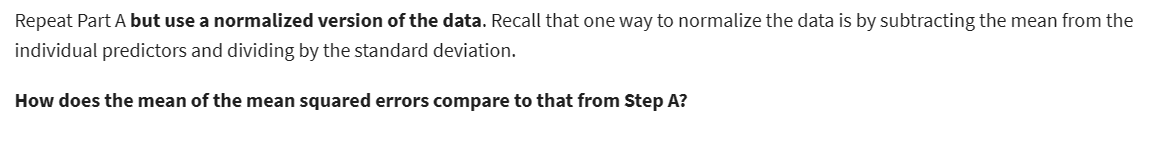

###### Now lets see what happens to mean and standard deviation after normalising the data

In [47]:
train_X_norm = (train_X - train_X.mean())/train_X.std()
test_X_norm = (test_X - train_X.mean())/test_X.std()

# Now trianing the model with normalized data
model = regression_model()
model.fit(train_X_norm, train_y, epochs = 50, verbose = 0)

##### Mean Squared Error

In [43]:
import sklearn.metrics as metrics

predictions = model.predict(test_X_norm)    # Predicting the targets for input testing data
reg_MSE = metrics.mean_squared_error(test_y, predictions)   # mean squared error between predictions and actual values
reg_MSE

10/10 [==============================] - 0s 3ms/step


488.49391637695425

##### Creating a list of mean squared errors

In [44]:
mse_list = []    # we will append the mean square errors to this empty list

# Runing the loop for 50 iterrations
for i in range(50):
    
    # Test-Train Split
    train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 4,  shuffle=True)
    train_X_norm = (train_X - train_X.mean())/train_X.std()
    test_X_norm = (test_X - train_X.mean())/test_X.std()
    
    #fitting the model after randomly 
    model = regression_model().fit( train_X_norm, train_y, epochs = 50, verbose = 0)
    predictions = pretrained_model.predict(test_X_norm)    # Predicting the targets for input testing data
    reg_MSE = metrics.mean_squared_error(test_y, predictions)   # mean squared error between predictions and actual values
    mse_list.append(reg_MSE)

mse_list

10/10 [==============================] - 0s 3ms/step


[1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269

#### Mean and the standard deviation the of the mean squared error.

In [45]:
import numpy as np
# mean of the mean squared errors
mean = sum(mse_list)/50 
mean

#standard deviation
mse_std = np.sqrt(sum([(i-mean)**2 for i in mse_list]))/np.sqrt(50)
mse_std

1.8189894035458565e-12

So the mean and the standard deviation for both parts are different. In part B the deviation is a bit more than part A. The mean squared error for part B is also larger than in part A.

# Part C
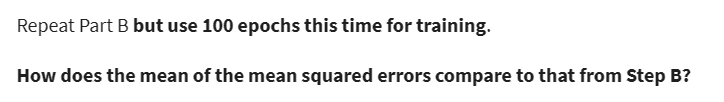
Repeating part B with 100 epochs.

In [48]:
model.fit(train_X_norm, train_y, epochs = 100, verbose = 0)

#### Mean squared error

In [49]:
import sklearn.metrics as metrics

predictions = model.predict(test_X_norm)    # Predicting the targets for input testing data
reg_MSE = metrics.mean_squared_error(test_y, predictions)   # mean squared error between predictions and actual values
reg_MSE

10/10 [==============================] - 0s 3ms/step


148.40559016701903

As we can see the mean squared error is small than mean squared error in part B.

##### Creating a list of 50 mean squared errors

In [50]:
mse_list = []    # we will append the mean square errors to this empty list

# Runing the loop for 50 iterrations
for i in range(50):
    
    # Test-Train Split
    train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 4,  shuffle=True)
    train_X_norm = (train_X - train_X.mean())/train_X.std()
    test_X_norm = (test_X - train_X.mean())/test_X.std()
    
    #fitting the model after randomly 
    model = regression_model().fit( train_X_norm, train_y, epochs = 50, verbose = 0)
    predictions = pretrained_model.predict(test_X_norm)    # Predicting the targets for input testing data
    reg_MSE = metrics.mean_squared_error(test_y, predictions)   # mean squared error between predictions and actual values
    mse_list.append(reg_MSE)

mse_list

10/10 [==============================] - 0s 2ms/step


[1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269

###### Mean and the standard deviation the of the mean squared error.

In [51]:
import numpy as np
# mean of the mean squared errors
mean = sum(mse_list)/50 
mean

#standard deviation
mse_std = np.sqrt(sum([(i-mean)**2 for i in mse_list]))/np.sqrt(50)
mse_std

1.8189894035458565e-12

As we can see that standard deviation in part C, with 100 epochs, is almost same to that in Part B, with 50 epochs.

# Part D
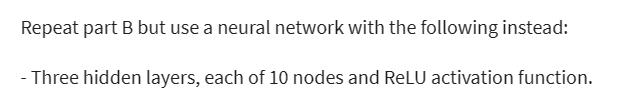

In [53]:
"Building the model"
def regression_model():
    # model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols, )))    #1st Hidden layer
    model.add(Dense(10, activation = 'relu'))                         # 2ne Hidden layer
    model.add(Dense(10, activation = 'relu'))                         # 3rd hidden layer
    model.add(Dense(1))  #output layer
    
    'Optimizing the model'
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    return model
    
train_X_norm = (train_X - train_X.mean())/train_X.std()
test_X_norm = (test_X - train_X.mean())/test_X.std()

# Now trianing the model with normalized data
model = regression_model()
model.fit(train_X_norm, train_y, epochs = 50, verbose = 0)

#### Mean Squared error

In [54]:
import sklearn.metrics as metrics

predictions = model.predict(test_X_norm)    # Predicting the targets for input testing data
reg_MSE = metrics.mean_squared_error(test_y, predictions)   # mean squared error between predictions and actual values
reg_MSE

10/10 [==============================] - 0s 2ms/step


127.2055436292101

#### Creating a list of 50 mean squared errors

In [55]:
mse_list = []    # we will append the mean square errors to this empty list

# Runing the loop for 50 iterrations
for i in range(50):
    
    # Test-Train Split
    train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 4,  shuffle=True)
    train_X_norm = (train_X - train_X.mean())/train_X.std()
    test_X_norm = (test_X - train_X.mean())/test_X.std()
    
    #fitting the model after randomly 
    model = regression_model().fit( train_X_norm, train_y, epochs = 50, verbose = 0)
    predictions = pretrained_model.predict(test_X_norm)    # Predicting the targets for input testing data
    reg_MSE = metrics.mean_squared_error(test_y, predictions)   # mean squared error between predictions and actual values
    mse_list.append(reg_MSE)

mse_list

10/10 [==============================] - 0s 2ms/step


[1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269961716,
 1532.1889269

###### Mean and the standard deviation the of the mean squared error.

In [56]:
import numpy as np
# mean of the mean squared errors
mean = sum(mse_list)/50 
mean

#standard deviation
mse_std = np.sqrt(sum([(i-mean)**2 for i in mse_list]))/np.sqrt(50)
mse_std

1.8189894035458565e-12

In [ ]:
The standard deviation is a little bit less than in part B.